<a href="https://colab.research.google.com/github/guifrribeiro/igti_ml/blob/master/desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Este programa é utilizado para o desenvolvimento do desafio da disciplina FAM do bootcamp de MLE

In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sn #biblioteca utilizada para plots mais bonitos
from sklearn.model_selection import train_test_split #biblioteca para a divisão do dataset entre treinamento e teste

In [0]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (2).csv


In [0]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataframe_bikes_mod= pd.read_csv(nome_do_arquivo)

In [0]:
#apresentando as 5 primeiras linhas do dataset
dataframe_bikes_mod.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [0]:
dataframe_bikes_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [0]:
dataframe_bikes_mod.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [0]:
dataframe_bikes_mod.dropna(axis=0,subset=['dteday'])
newdataframe = dataframe_bikes_mod.dropna(axis = 0, subset = ['dteday'])

In [0]:
newdataframe.shape

(15641, 17)

In [0]:
newdataframe.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [0]:
newdataframe['season'].unique()

array([ 1., nan,  2.,  3.,  4.])

In [0]:
pd.to_datetime(newdataframe['dteday'])

1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
5       2011-01-01
           ...    
17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 15641, dtype: datetime64[ns]

In [0]:
max(newdataframe['dteday'])

'2012-12-31'

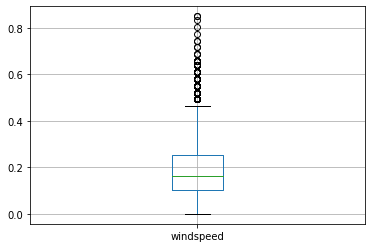

In [0]:
newdataframe[['windspeed']].boxplot()

In [0]:
new_df=newdataframe[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
new_df.head()

,season,temp,atemp,hum,windspeed,cnt
1,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.24,0.2879,0.75,0.0000,1.0
5,1.0,0.24,0.2576,0.75,0.0896,1.0


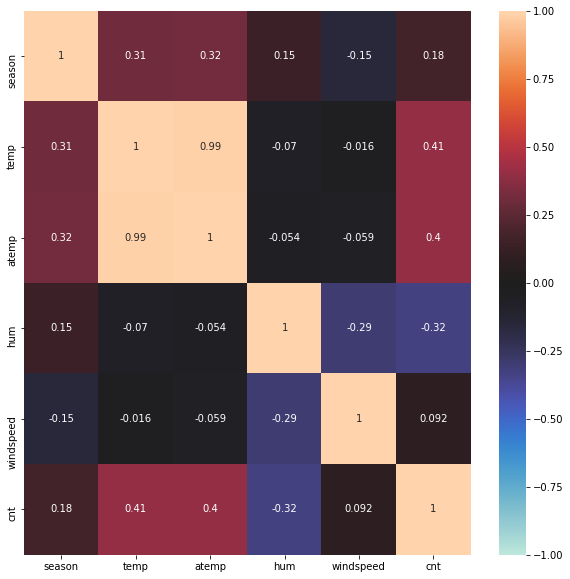

In [0]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(10, 10))
matriz_de_correlação = new_df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [0]:
dataframe_bikes_mod.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [0]:
new_df_nan = dataframe_bikes_mod.fillna(dataframe_bikes_mod.mean())

In [0]:
new_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      17379 non-null  float64
 3   yr          17379 non-null  float64
 4   mnth        17379 non-null  float64
 5   hr          17379 non-null  float64
 6   holiday     17379 non-null  float64
 7   weekday     17379 non-null  float64
 8   workingday  17379 non-null  float64
 9   weathersit  17379 non-null  float64
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  float64
 15  registered  17379 non-null  float64
 16  cnt         17379 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [0]:
arrayX = new_df_nan[['hum', 'casual']] #variável independente
y=new_df_nan['cnt'].values #variável dependente 

In [0]:
print(arrayX)

        hum     casual
0      0.81   3.000000
1      0.80   8.000000
2      0.80   5.000000
3      0.75   3.000000
4      0.75   0.000000
...     ...        ...
17374  0.60  11.000000
17375  0.60  35.583147
17376  0.60   7.000000
17377  0.56  13.000000
17378  0.65  12.000000

[17379 rows x 2 columns]


In [0]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [0]:
reg= LinearRegression()
#x_Reshaped=x.reshape(-1, 1) #coloca os dados no formato 2D
regressao= reg.fit (arrayX,y) # encontra os coeficientes (realiza a regressão)

In [0]:
previsao=reg.predict(arrayX)

In [0]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [0]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-100.98900093    2.20087962]X 174.98415936102225
Coeficiente de Determinação (R2): 0.40561165206692495


In [0]:
from sklearn.preprocessing import MinMaxScaler
new_df_nan=new_df_nan[['hum','casual','cnt']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df_nan)

In [0]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [0]:
entrada_arvore=scaled_df[:,1].reshape(-1,1) #entrada para a regressão via árvore
saida_arvore=scaled_df[:,2].reshape(-1,1) #saída para a regressão via árvore

In [0]:
x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

In [0]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(x_test)

In [0]:
print(previsao_arvore)

[0.4482582  0.09022928 0.04045823 ... 0.58770492 0.25266527 0.03247953]


In [0]:
from sklearn import metrics
print('Erro absoluto:', metrics.mean_absolute_error(y_test, previsao_arvore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, previsao_arvore))

Erro absoluto: 0.08973305979549001
Mean Squared Error: 0.01624803256996232


In [0]:
R_2 = r2_score(y_test, previsao_arvore)  #realiza o cálculo do R2
print(R_2)

0.46504006733621006
